In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
users= pd.read_csv(r'C:\Users\dell\Chicago_Crime_Detective.csv')
users

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001


In [3]:
users.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
users.tail()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001
191640,191640,1310463,1/1/01 0:01,STREET,False,False,1911,NaN,NaN,2001


In [5]:
users.dtypes

Unnamed: 0              int64
ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [6]:
users['Date']=pd.to_datetime(users['Date'])

In [7]:
users.dtypes

Unnamed: 0                      int64
ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [8]:
mediandate= statistics.median(users['Date'])

In [9]:
mediandate

Timestamp('2006-05-21 12:30:00')

In [10]:
users.groupby(users['Date'].dt.strftime('%B'))['Date'].count()

Date
April        15280
August       16572
December     16426
February     13511
January      16047
July         16801
June         16002
March        15758
May          16035
November     16063
October      17086
September    16060
Name: Date, dtype: int64

In [11]:
users.groupby([users['Date'].dt.strftime('%B'),'Arrest'])['Date'].count()

Date       Arrest
April      False     14028
           True       1252
August     False     15243
           True       1329
December   False     15029
           True       1397
February   False     12273
           True       1238
January    False     14612
           True       1435
July       False     15477
           True       1324
June       False     14772
           True       1230
March      False     14460
           True       1298
May        False     14848
           True       1187
November   False     14807
           True       1256
October    False     15744
           True       1342
September  False     14812
           True       1248
Name: Date, dtype: int64

In [12]:
users.groupby(users['Date'].dt.strftime('%a'))['Date'].count()

Date
Fri    29284
Mon    27397
Sat    27118
Sun    26316
Thu    27319
Tue    26791
Wed    27416
Name: Date, dtype: int64

In [13]:
users.groupby(users['Date'].dt.strftime('%Y'))['Date'].count()

Date
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: Date, dtype: int64

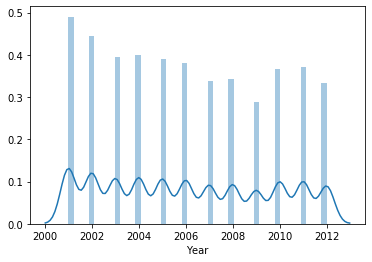

In [14]:
sns.distplot(users.Year)

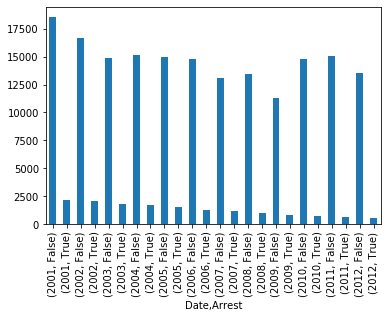

In [15]:
users.groupby([users['Date'].dt.strftime('%Y'),'Arrest'])['Date'].count().plot.bar()

In [16]:
top5=users.groupby('LocationDescription')['ID'].count().sort_values(ascending=False)

In [17]:
top5.head(10)

LocationDescription
STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
RESIDENTIAL YARD (FRONT/BACK)       1536
RESIDENCE                           1302
RESIDENCE-GARAGE                    1176
VACANT LOT/LAND                      985
Name: ID, dtype: int64

In [18]:
users.groupby([users['Date'].dt.strftime('%Y'),'Arrest'])['Date'].count()

Date  Arrest
2001  False     18517
      True       2152
2002  False     16638
      True       2115
2003  False     14859
      True       1798
2004  False     15169
      True       1693
2005  False     14956
      True       1528
2006  False     14796
      True       1302
2007  False     13068
      True       1212
2008  False     13425
      True       1020
2009  False     11327
      True        840
2010  False     14796
      True        701
2011  False     15012
      True        625
2012  False     13542
      True        550
Name: Date, dtype: int64

In [19]:
tda=users[users.LocationDescription=='GAS STATION']

In [20]:
tda.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
13,13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012
106,106,8948353,2012-12-29 10:00:00,GAS STATION,False,False,823,8,66,2012
213,213,8945802,2012-12-27 10:00:00,GAS STATION,False,False,321,3,42,2012
278,278,8943877,2012-12-25 10:00:00,GAS STATION,False,False,332,3,43,2012
290,290,8943595,2012-12-24 21:55:00,GAS STATION,False,False,421,4,43,2012


In [21]:
tda.groupby(tda['Date'].dt.strftime('%A'))['Date'].count().sort_values(ascending=False)

Date
Saturday     338
Sunday       336
Friday       332
Thursday     282
Monday       280
Wednesday    273
Tuesday      270
Name: Date, dtype: int64